<a href="https://colab.research.google.com/github/AmatSaw04/Python-projects/blob/main/Day_99_Space_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<>:28: SyntaxWarning: invalid escape sequence '\$'
<>:28: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-2118109103.py:28: SyntaxWarning: invalid escape sequence '\$'
  df['Price'] = df['Price'].replace('[\$,]', '', regex=True)


   Unnamed: 0.1 Organisation  \
0             0       SpaceX   
1             1         CASC   
2             2       SpaceX   
3             3    Roscosmos   
4             4          ULA   

                                            Location  \
0         LC-39A, Kennedy Space Center, Florida, USA   
1  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2                      Pad A, Boca Chica, Texas, USA   
3       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4           SLC-41, Cape Canaveral AFS, Florida, USA   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance

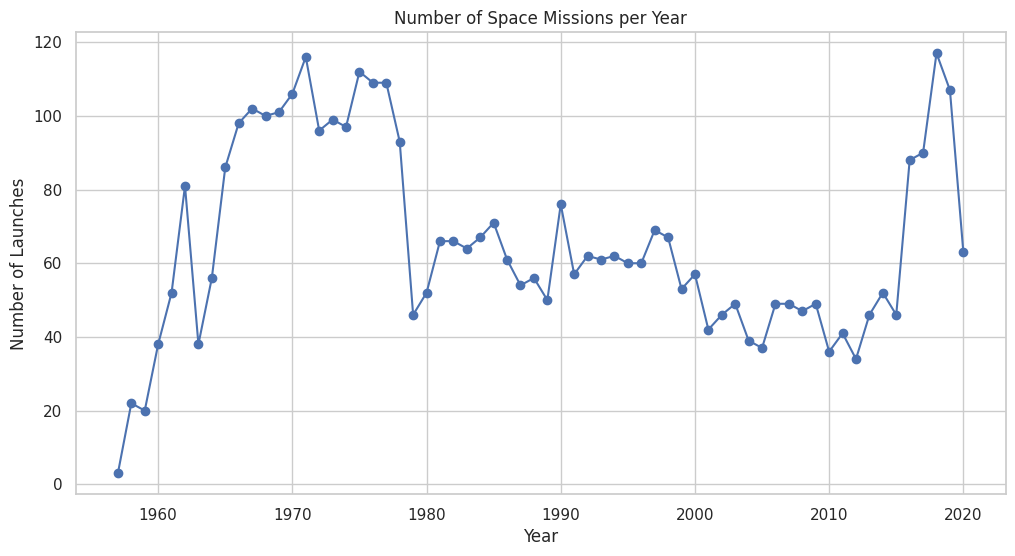

/tmp/ipython-input-2118109103.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_orgs.values, y=top_orgs.index, palette="viridis")


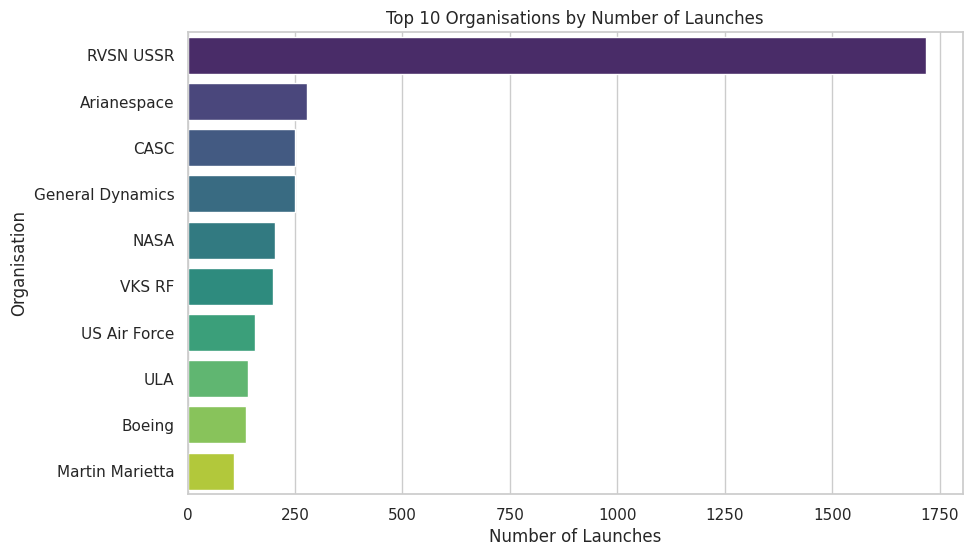

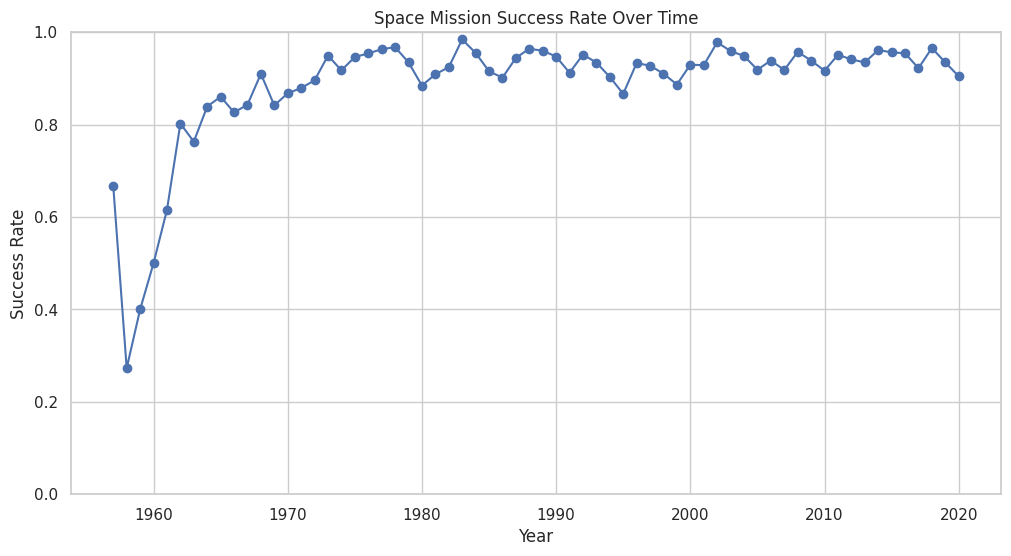

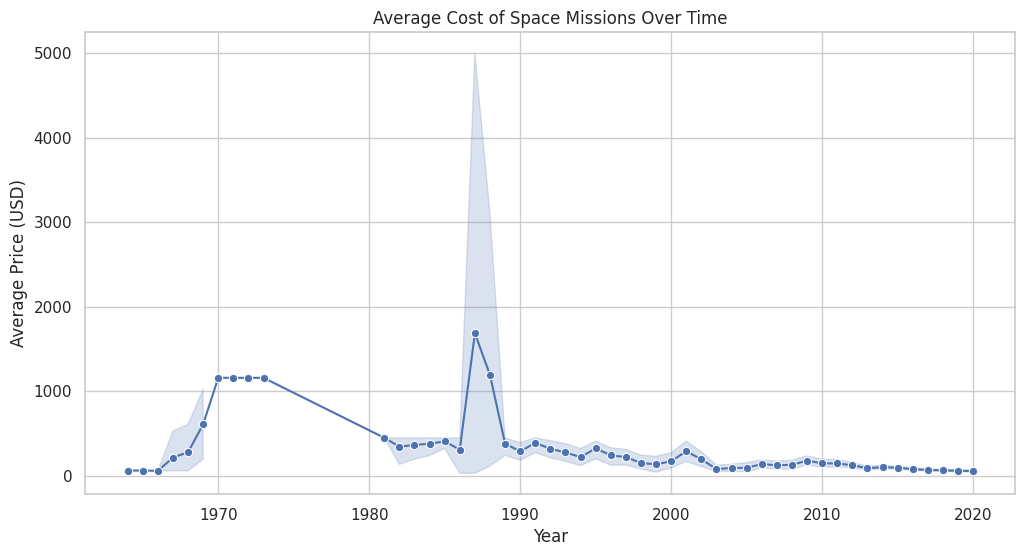

/tmp/ipython-input-2118109103.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_counts.index, y=month_counts.values, palette="coolwarm")


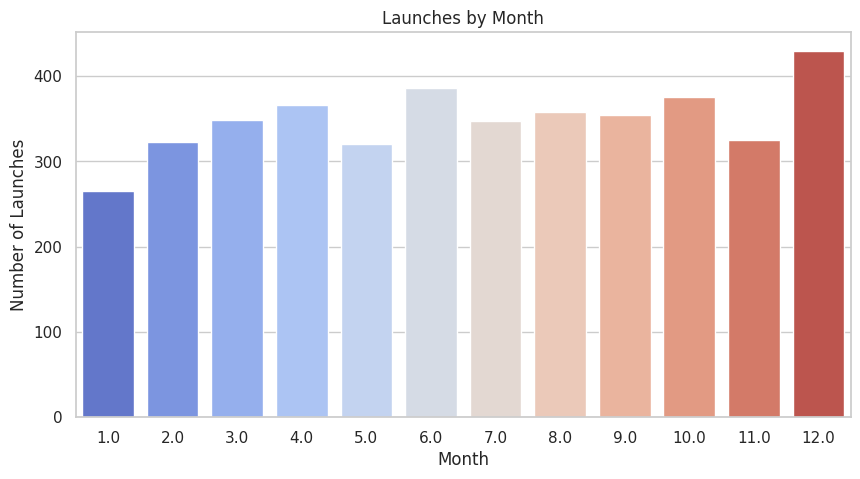

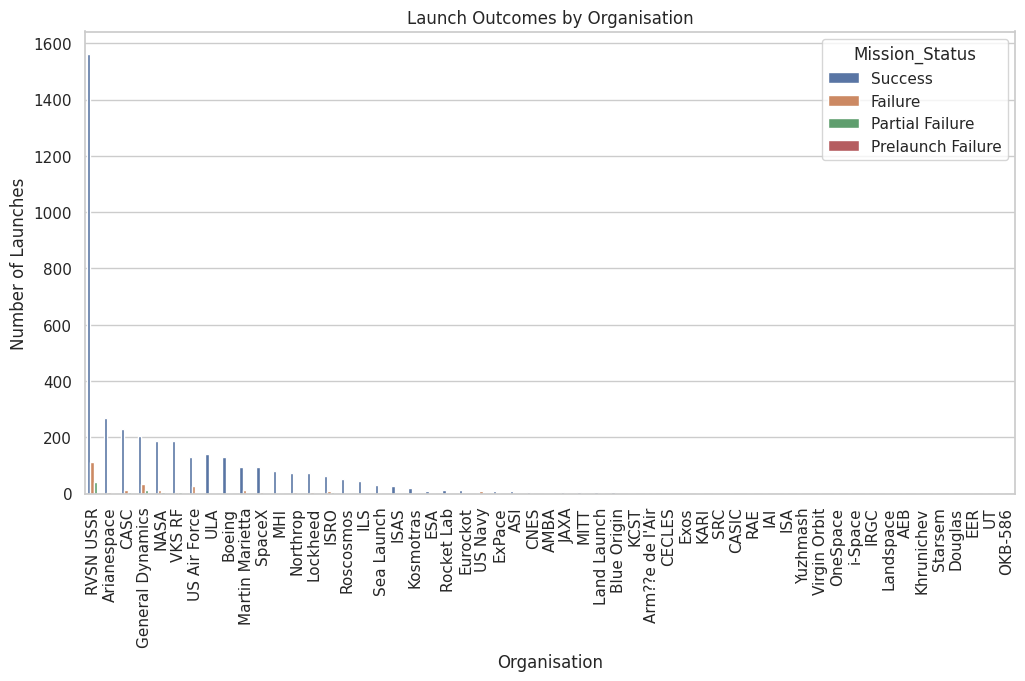

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style="whitegrid")
%matplotlib inline

df = pd.read_csv('/content/mission_launches.csv')

if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# Quick look at the data
print(df.head())
print(df.info())
print(df.describe())


df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract year and month
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

# Clean Price column (remove symbols and convert to numeric)
df['Price'] = df['Price'].replace('[\$,]', '', regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Fill or drop missing values (adjust based on dataset)
df = df.dropna(subset=['Date', 'Mission_Status', 'Organisation'])


launches_per_year = df.groupby('year').size()
plt.figure(figsize=(12,6))
launches_per_year.plot(kind='line', marker='o')
plt.title("Number of Space Missions per Year")
plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.show()


top_orgs = df['Organisation'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_orgs.values, y=top_orgs.index, palette="viridis")
plt.title("Top 10 Organisations by Number of Launches")
plt.xlabel("Number of Launches")
plt.ylabel("Organisation")
plt.show()


success_rate = df.groupby('year')['Mission_Status'].apply(lambda x: (x=='Success').mean())
plt.figure(figsize=(12,6))
success_rate.plot(marker='o')
plt.title("Space Mission Success Rate Over Time")
plt.xlabel("Year")
plt.ylabel("Success Rate")
plt.ylim(0,1)
plt.show()


plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='year', y='Price', estimator='mean', marker='o')
plt.title("Average Cost of Space Missions Over Time")
plt.xlabel("Year")
plt.ylabel("Average Price (USD)")
plt.show()


month_counts = df['month'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.barplot(x=month_counts.index, y=month_counts.values, palette="coolwarm")
plt.title("Launches by Month")
plt.xlabel("Month")
plt.ylabel("Number of Launches")
plt.show()


# Sunburst chart: Organisation -> Rocket_Status
fig = px.sunburst(df, path=['Organisation','Rocket_Status'], values='Price',
                  title="Missions by Organisation and Rocket Status")
fig.show()

# Success vs Failure per organisation (Segmented Bar)
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Organisation', hue='Mission_Status', order=df['Organisation'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Launch Outcomes by Organisation")
plt.xlabel("Organisation")
plt.ylabel("Number of Launches")
plt.show()

